In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
from scipy.stats import linregress


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
data_total = pd.merge(mouse_metadata, study_results)

data_total.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Groupby required statistics (samples.ipynb 03)(https://www.dataquest.io/blog/pandas-cheat-sheet/)(Checked Pymoli Data Analysis reference (purchasing analysis (age)))
data_total_stats = data_total.groupby(["Drug Regimen"])
data_total_stats

data_total_mean = data_total_stats["Tumor Volume (mm3)"].mean()

data_total_median = data_total_stats["Tumor Volume (mm3)"].median()

data_total_variance = data_total_stats["Tumor Volume (mm3)"].var()

data_total_standard_dev = data_total_stats["Tumor Volume (mm3)"].std()

data_total_SEM = data_total_stats["Tumor Volume (mm3)"].sem()

#Create Data Frame (HeroesOfPymoli reference)
summary_table = pd.DataFrame ({"Mean": data_total_mean,"Median": data_total_median,"Variance": data_total_variance,"Standard deviation": data_total_standard_dev,"SEM (Standard error of the mean)": data_total_SEM})
summary_table

,Mean,Median,Variance,Standard deviation,SEM (Standard error of the mean)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


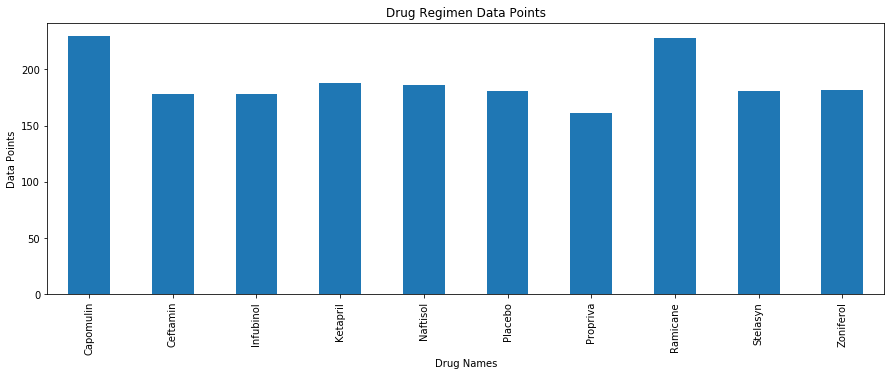

<Figure size 432x288 with 0 Axes>

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

#avg_state_rain.ipynb
#groupby Drug Regimen (HeroesOfPymoli_Solution.ipynb)

data_total_data_points = data_total.groupby(["Drug Regimen"]).count()["Mouse ID"]
data_total_data_points

data_total_data_points.plot(kind="bar", figsize=(15,5))


plt.title("Drug Regimen Data Points")
plt.xlabel("Drug Names")
plt.ylabel("Data Points")

plt.show()
plt.tight_layout()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

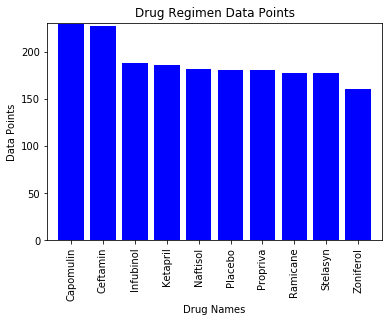

In [4]:
dr_usage = [230,228,188,186,182,181,181,178,178,161]

x_axis = np.arange(len(dr_usage))
plt.bar(x_axis, dr_usage, color="b", align="center")

tick_locations = [value for value in x_axis]
Drug_Regimen = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
plt.xticks(tick_locations, Drug_Regimen)

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(dr_usage)+0.8)

plt.title("Drug Regimen Data Points")
plt.xlabel("Drug Names")
plt.ylabel("Data Points")


#https://stackoverflow.com/questions/32244019/how-to-rotate-x-axis-tick-labels-in-pandas-barplot
plt.xticks(rotation=90)

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#bike_trippin.ipynb
#/UCSD-Coding-04-Pandas/Solutions/PyCitySchools/PyCitySchools_Solution.ipynb
gender_data = data_total.groupby("Sex").count()



In [6]:
gender_df = gender_data["Drug Regimen"]
gender_df

Sex
Female    935
Male      958
Name: Drug Regimen, dtype: int64

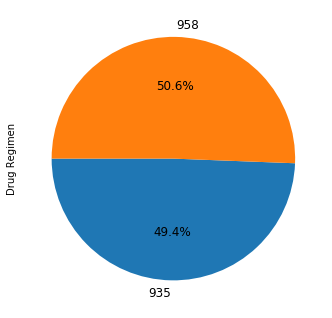

In [7]:
plt.figure(figsize=(12,8))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y= "Sex", ax=ax1, autopct='%1.1f%%', startangle=180, labels=gender_df, fontsize=12)

(-1.105172849624489,
 1.1027130801595115,
 -1.1045613723658971,
 1.1002172082078998)

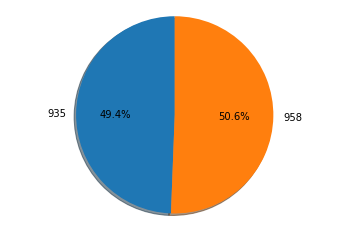

In [8]:
#py_pie.ipynb (https://www.youtube.com/watch?v=0P7QnIQDBJY)



plt.pie(gender_df, labels=gender_df, 
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")


In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

#https://pandas.pydata.org/pandas-docs/stable/reference/frame.html


In [10]:
# PandasRecap.ipynb

capomulin_drug = data_total.loc[data_total["Drug Regimen"] == 'Capomulin',:]
ceftamin_drug = data_total.loc[data_total["Drug Regimen"] == 'Ceftamin',:]
infubinol_drug = data_total.loc[data_total["Drug Regimen"] == 'Infubinol',:]
ramicane_drug = data_total.loc[data_total["Drug Regimen"] == 'Ramicane',:]
capomulin_drug.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [11]:
#Merging.ipynb
capomulin_drug_vol = capomulin_drug.groupby("Mouse ID").max()["Timepoint"]
capomulin_drug_totalvol = pd.DataFrame(capomulin_drug_vol)
merge_capomulin =pd.merge(capomulin_drug_totalvol, data_total, on=("Mouse ID", "Timepoint"), how="outer")
merge_capomulin.head()                          

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [12]:
#samples.ipynb

capomulin_tumors = merge_capomulin["Tumor Volume (mm3)"]

quartiles = capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

Values below 28.061699415000003 could be outliers.
Values above 73.230500975 could be outliers.
The lower quartile of temperatures is: 45.0
The upper quartile of temperatures is: 56.29220039
The interquartile range of temperatures is: 11.292200389999998
The the median of temperatures is: 48.95147442 


In [13]:
ceftamin_drug_vol = ceftamin_drug.groupby("Mouse ID").max()["Timepoint"]
ceftamin_drug_totalvol = pd.DataFrame(ceftamin_drug_vol)
merge_ceftamin =pd.merge(ceftamin_drug_totalvol, data_total, on=("Mouse ID", "Timepoint"), how="outer")
merge_ceftamin.head()  

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [14]:
ceftamin_tumors = merge_ceftamin["Tumor Volume (mm3)"]

quartiles = ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

Values below 28.061699415000003 could be outliers.
Values above 73.230500975 could be outliers.
The lower quartile of temperatures is: 45.0
The upper quartile of temperatures is: 56.29220039
The interquartile range of temperatures is: 11.292200389999998
The the median of temperatures is: 48.95147442 


In [15]:
infubinol_drug_vol = infubinol_drug.groupby("Mouse ID").max()["Timepoint"]
infubinol_drug_totalvol = pd.DataFrame(infubinol_drug_vol)
merge_infubinol =pd.merge(infubinol_drug_totalvol, data_total, on=("Mouse ID", "Timepoint"), how="outer")
merge_infubinol.head()   

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [16]:
infubinol_tumors = merge_infubinol["Tumor Volume (mm3)"]

quartiles = infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

Values below 28.061699415000003 could be outliers.
Values above 73.230500975 could be outliers.
The lower quartile of temperatures is: 45.0
The upper quartile of temperatures is: 56.29220039
The interquartile range of temperatures is: 11.292200389999998
The the median of temperatures is: 48.95147442 


In [17]:
ramicane_drug_vol = ramicane_drug.groupby("Mouse ID").max()["Timepoint"]
ramicane_drug_totalvol = pd.DataFrame(ramicane_drug_vol)
merge_ramicane =pd.merge(ramicane_drug_totalvol, data_total, on=("Mouse ID", "Timepoint"), how="outer")
merge_ramicane.head() 

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [18]:
ramicane_tumors = merge_ramicane["Tumor Volume (mm3)"]

quartiles = ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

Values below 28.061699415000003 could be outliers.
Values above 73.230500975 could be outliers.
The lower quartile of temperatures is: 45.0
The upper quartile of temperatures is: 56.29220039
The interquartile range of temperatures is: 11.292200389999998
The the median of temperatures is: 48.95147442 


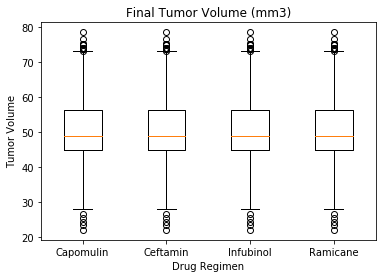

In [19]:
#Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.
final_tumor_volume = [capomulin_tumors, ceftamin_tumors, infubinol_tumors, ramicane_tumors]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume (mm3)')
ax1.set_ylabel('Tumor Volume')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(final_tumor_volume, labels=["Capomulin","Ceftamin","Infubinol","Ramicane",])


plt.show()





In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_drug = data_total.loc[data_total["Drug Regimen"] == 'Capomulin',:]
capomulin_drug

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [21]:
s185_capomulin_drug = data_total.loc[data_total["Mouse ID"] == 's185',:]
s185_capomulin_drug

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


Text(0, 0.5, 'Tumor Volume')

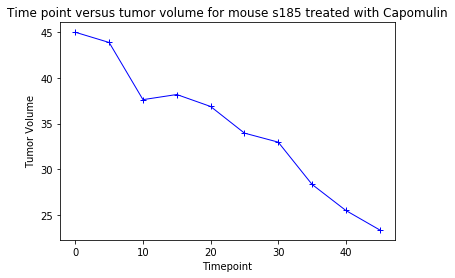

In [22]:
#legendary_temp.ipynb

tv = s185_capomulin_drug["Tumor Volume (mm3)"]

x_axis = s185_capomulin_drug["Timepoint"]

plt.plot(x_axis, tv, marker="+",color="blue", linewidth=1, label="Timepoint")
plt.title("Time point versus tumor volume for mouse s185 treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")



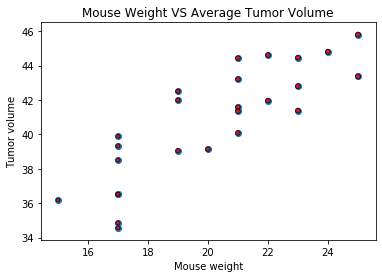

In [23]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#weight vs tumor volume scatter plot/find average (ice_cream_sales.ipynb) (HeroesOfPymoli_Solution.ipynb)

capomulin_average = capomulin_drug.groupby(["Mouse ID"]).mean()
plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])

x_axis = capomulin_average["Weight (g)"]
weight_capomulin = capomulin_average["Tumor Volume (mm3)"]

plt.scatter(x_axis, weight_capomulin, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)

plt.title("Mouse Weight VS Average Tumor Volume")
plt.xlabel("Mouse weight")
plt.ylabel("Tumor volume")

plt.show()


In [24]:
#correlation.ipynb

correlation = st.pearsonr(capomulin_average["Weight (g)"],capomulin_average["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


In [25]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen


# mouse weight - tv  (regression.ipynb) (crime.ipynb)

#capomulin_average["Weight (g)"],capomulin_average["Tumor Volume (mm3)"]


data_chart = linregress(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
data_chart

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

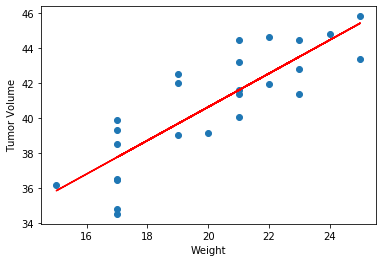

In [27]:
x_values = capomulin_average["Weight (g)"]
y_values = capomulin_average["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.show()